###Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib as plt # data visualization
#import matplotlib.pyplot as plt
import seaborn as sns #data visualization
import random 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd

pokemon = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/pokemon.csv')

Mounted at /content/gdrive


In [ ]:
pokemon = pokemon.rename(index=str, columns={"#": "Number"})

In [ ]:
combat = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/combats.csv')

In [ ]:
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [ ]:
print("Dimenstions of Pokemon: " + str(pokemon.shape))
print("Dimenstions of Combat: " + str(combat.shape))

Dimenstions of Pokemon: (801, 41)
Dimenstions of Combat: (50000, 3)


### Missing Values

In [ ]:
pokemon.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [ ]:
combat.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [ ]:
combat

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
...,...,...,...
49995,707,126,707
49996,589,664,589
49997,303,368,368
49998,109,89,109


### Wins

In [ ]:
# calculate the win % of each pokemon 
total_Wins = combat.Winner.value_counts()

# get the number of wins for each pokemon
numberOfWins = combat.groupby('Winner').count()

In [ ]:
countByFirst = combat.groupby('Second_pokemon').count()
countBySecond = combat.groupby('First_pokemon').count()
print("Looking at the dimensions of the dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))

Looking at the dimensions of the dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


In [ ]:
find_losing_pokemon= np.setdiff1d(countByFirst.index.values, numberOfWins.index.values)-1 #offset because the index and number are off by one
losing_pokemon = pokemon.iloc[find_losing_pokemon[0],]
print(losing_pokemon)

abilities            ['Pickup', 'Sand Veil']
against_bug                                1
against_dark                               1
against_dragon                             1
against_electric                           0
against_fairy                              1
against_fight                              1
against_fire                               1
against_flying                             1
against_ghost                              1
against_grass                              2
against_ground                             1
against_ice                                2
against_normal                             1
against_poison                           0.5
against_psychic                            1
against_rock                             0.5
against_steel                              1
against_water                              2
attack                                    60
base_egg_steps                          5120
base_happiness                            70
base_total

Phanpy has is just below average when it comes to attack and defense. Very low special attacks and defense. Has no competive edge over pokemon. 

In [ ]:
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']
numberOfWins

# merged winning dataset and the original pokemon dataset
results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='pokedex_number')
results3 = pd.merge(pokemon, numberOfWins, left_on='pokedex_number', right_index = True, how='left')

#We can look at the difference between the two datasets to see which pokemon never recorded a fight
#subset the dataframe where pokemon win percent is NaN
results3[results3['Win Percentage'].isnull()]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
11,"['Compoundeyes', 'Tinted Lens']",0.50,1.0,1.0,2.0,1.0,0.25,2.0,2.0,1.0,0.25,0.00,2.0,1.0,1.0,1.0,4.0,1.0,1.0,45,3840,70,395,45,Butterfly Pokémon,50,1000000,1.1,60,Butterfreeバタフリー,Butterfree,50.0,12,90,80,70,bug,flying,32.0,1,0,NaN,NaN,NaN,NaN
32,"['Poison Point', 'Rivalry', 'Hustle']",0.50,1.0,1.0,1.0,0.5,0.50,1.0,1.0,1.0,0.50,2.00,1.0,1.0,0.5,2.0,1.0,1.0,1.0,72,5120,70,365,120,Poison Pin Pokémon,57,1059860,0.9,61,Nidorinoニドリーノ,Nidorino,100.0,33,55,55,65,poison,NaN,19.5,1,0,NaN,NaN,NaN,NaN
45,"['Effect Spore', 'Dry Skin', 'Damp']",2.00,1.0,1.0,0.5,1.0,0.50,4.0,4.0,1.0,0.25,0.25,2.0,1.0,2.0,1.0,2.0,1.0,0.5,70,5120,70,285,190,Mushroom Pokémon,55,1000000,0.3,35,Parasパラス,Paras,50.0,46,45,55,25,bug,grass,5.4,1,0,NaN,NaN,NaN,NaN
65,"['Guts', 'No Guard', 'Steadfast']",0.50,0.5,1.0,1.0,2.0,1.00,1.0,2.0,1.0,1.00,1.00,1.0,1.0,1.0,2.0,0.5,1.0,1.0,80,5120,70,305,180,Superpower Pokémon,50,1059860,0.8,70,Wanrikyワンリキー,Machop,75.4,66,35,35,35,fighting,NaN,19.5,1,0,NaN,NaN,NaN,NaN
77,"['Run Away', 'Flash Fire', 'Flame Body']",0.50,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,0.50,2.00,0.5,1.0,1.0,1.0,2.0,0.5,2.0,100,5120,70,500,60,Fire Horse Pokémon,70,1000000,1.7,65,Gallopギャロップ,Rapidash,50.0,78,80,80,105,fire,NaN,95.0,1,0,NaN,NaN,NaN,NaN
89,"['Shell Armor', 'Skill Link', 'Overcoat']",1.00,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,2.00,1.00,0.5,1.0,1.0,1.0,1.0,0.5,0.5,65,5120,70,305,190,Bivalve Pokémon,100,1250000,0.3,30,Shellderシェルダー,Shellder,50.0,90,45,25,40,water,NaN,4.0,1,0,NaN,NaN,NaN,NaN
143,"['Pressure', 'Snow Cloak']",0.50,1.0,1.0,2.0,1.0,1.00,2.0,1.0,1.0,0.50,0.00,1.0,1.0,1.0,1.0,4.0,2.0,1.0,85,20480,35,580,3,Freeze Pokémon,100,1250000,1.7,90,Freezerフリーザー,Articuno,NaN,144,95,125,85,ice,flying,55.4,1,1,NaN,NaN,NaN,NaN
182,"['Thick Fat', 'Huge Power', 'Sap Sipper']",0.50,0.5,0.0,2.0,1.0,0.50,0.5,1.0,1.0,2.00,1.00,0.5,1.0,2.0,1.0,1.0,1.0,0.5,20,2560,70,250,190,Aquamouse Pokémon,50,800000,0.4,70,Marilマリル,Marill,50.0,183,20,50,40,water,fairy,8.5,2,0,NaN,NaN,NaN,NaN
230,"['Pickup', 'Sand Veil']",1.00,1.0,1.0,0.0,1.0,1.00,1.0,1.0,1.0,2.00,1.00,2.0,1.0,0.5,1.0,0.5,1.0,2.0,60,5120,70,330,120,Long Nose Pokémon,60,1000000,0.5,90,Gomazouゴマゾウ,Phanpy,50.0,231,40,40,40,ground,NaN,33.5,2,0,NaN,NaN,NaN,NaN
235,"['Guts', 'Steadfast', 'Vital Spirit']",0.50,0.5,1.0,1.0,2.0,1.00,1.0,2.0,1.0,1.00,1.00,1.0,1.0,1.0,2.0,0.5,1.0,1.0,35,6400,70,210,75,Scuffle Pokémon,35,1000000,0.7,35,Balkieバルキー,Tyrogue,100.0,236,35,35,35,fighting,NaN,21.0,2,0,NaN,NaN,NaN,NaN


In [ ]:
#missing_Pokemon = np.setdiff1d(pokemon.index.values, results3.index.values)

[]


Top 10 Pokemon with the worse win percentage

In [ ]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage']).head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
289,"['Compoundeyes', 'Run Away']",1.0,1.0,1.0,0.0,1.0,0.5,2.0,2.0,1.0,1.00,0.5,2.00,1.0,0.5,1.0,1.0,1.00,2.0,45,3840,70,266,255,Trainee Pokémon,90,600000,0.5,31,Tutininツチニン,Nincada,50.0,290,30,30,40,bug,ground,5.5,3,0,3.0,3.0,138.0,0.021739
189,"['Run Away', 'Pickup', 'Skill Link']",1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.00,1.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0,70,5120,70,360,45,Long Tail Pokémon,55,800000,0.8,55,Eipamエイパム,Aipom,50.0,190,40,55,85,normal,NaN,11.5,2,0,3.0,3.0,122.0,0.024590
638,['Justified'],0.5,0.5,1.0,1.0,2.0,2.0,0.5,1.0,1.0,2.00,2.0,1.00,0.5,0.5,2.0,0.5,2.00,2.0,129,20480,35,580,3,Cavern Pokémon,90,1250000,1.9,91,Terrakionテラキオン,Terrakion,NaN,639,72,90,108,rock,fighting,260.0,5,1,4.0,4.0,129.0,0.031008
236,"['Intimidate', 'Technician', 'Steadfast']",0.5,0.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.00,1.0,1.00,1.0,1.0,2.0,0.5,1.00,1.0,95,6400,70,455,45,Handstand Pokémon,95,1000000,1.4,50,Kapoererカポエラー,Hitmontop,100.0,237,35,110,70,fighting,NaN,48.0,2,0,4.0,4.0,123.0,0.032520
576,"['Overcoat', 'Magic Guard', 'Regenerator']",2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.00,1.0,1.0,0.5,1.0,1.00,1.0,30,5120,70,290,200,Cell Pokémon,40,1059860,0.3,45,Uniranユニラン,Solosis,50.0,577,105,50,20,psychic,NaN,1.0,5,0,5.0,5.0,128.0,0.039062
188,"['Chlorophyll', 'Leaf Guard', 'Infiltrator']",1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.25,0.0,4.00,1.0,2.0,1.0,2.0,1.00,0.5,55,5120,70,460,45,Cottonweed Pokémon,70,1059860,0.8,75,Wataccoワタッコ,Jumpluff,50.0,189,55,95,110,grass,flying,3.0,2,0,5.0,5.0,115.0,0.043478
394,"['Torrent', 'Defiant']",0.5,1.0,0.5,2.0,0.5,2.0,1.0,0.5,1.0,1.00,2.0,0.25,0.5,0.0,0.5,0.5,0.25,0.5,86,5120,70,530,45,Emperor Pokémon,88,1059860,1.7,84,Emperteエンペルト,Empoleon,88.1,395,111,101,60,water,steel,84.5,4,0,6.0,6.0,130.0,0.046154
209,"['Intimidate', 'Quick Feet', 'Rattled']",0.5,0.5,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.00,1.0,1.00,1.0,2.0,1.0,1.0,2.00,1.0,120,5120,70,450,75,Fairy Pokémon,75,800000,1.4,90,Granbuluグランブル,Granbull,24.6,210,60,60,45,fairy,NaN,48.7,2,0,6.0,6.0,125.0,0.048000
291,['Wonder Guard'],0.5,2.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,0.50,0.5,1.00,0.0,0.5,1.0,2.0,1.00,1.0,90,3840,70,236,45,Shed Pokémon,45,600000,0.8,1,Nukeninヌケニン,Shedinja,NaN,292,30,30,40,bug,ghost,1.2,3,0,7.0,7.0,133.0,0.052632
752,"['Leaf Guard', 'Contrary']",2.0,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,0.50,0.5,2.00,1.0,2.0,1.0,1.0,1.00,0.5,55,5120,70,250,190,Sickle Grass Pokémon,35,1000000,0.3,40,Karikiriカリキリ,Fomantis,50.0,753,50,35,35,grass,NaN,1.5,7,0,8.0,8.0,133.0,0.060150


Top 10 pokemon with the best win percentage

In [ ]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage'], ascending = False ).head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
154,"['Blaze', 'Flash Fire']",0.5,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Fire Mouse Pokémon,43,1059860,0.5,39,Hinoarashiヒノアラシ,Cyndaquil,88.1,155,60,50,65,fire,NaN,7.9,2,0,127.0,127.0,129.0,0.984496
512,"['Gluttony', 'Blaze']",0.5,1.0,1.0,1.0,0.5,1.00,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,53,5120,70,316,190,High Temp Pokémon,48,1000000,0.6,50,Baoppuバオップ,Pansear,88.1,513,53,48,64,fire,NaN,11.0,5,0,116.0,116.0,119.0,0.974790
703,"['Sap Sipper', 'Hydration', 'Gooey']",1.0,1.0,2.0,0.5,2.0,1.00,0.5,1.0,1.0,0.50,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,50,10240,35,300,45,Soft Tissue Pokémon,35,1250000,0.3,45,Numeraヌメラ,Goomy,50.0,704,55,75,40,dragon,NaN,2.8,6,0,121.0,121.0,125.0,0.968000
19,"['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...",1.0,1.0,1.0,1.0,1.0,2.00,1.0,1.0,0.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,71,3840,70,413,127,Mouse Pokémon,70,1000000,NaN,75,Rattaラッタ,Raticate,50.0,20,40,80,77,normal,dark,NaN,1,0,115.0,115.0,119.0,0.966387
153,"['Overgrow', 'Leaf Guard']",2.0,1.0,1.0,0.5,1.0,1.00,2.0,2.0,1.0,0.50,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5,82,5120,70,525,45,Herb Pokémon,100,1059860,1.8,80,Meganiumメガニウム,Meganium,88.1,154,83,100,80,grass,NaN,100.5,2,0,136.0,136.0,141.0,0.964539
476,"['Pressure', 'Frisk']",0.5,2.0,1.0,1.0,1.0,0.00,1.0,1.0,2.0,1.00,1.0,1.0,0.0,0.5,1.0,1.0,1.0,1.0,100,6400,35,525,45,Gripper Pokémon,135,800000,2.2,45,Yonoirヨノワール,Dusknoir,50.0,477,65,135,45,ghost,NaN,106.6,4,0,124.0,124.0,129.0,0.961240
726,"['Blaze', 'Intimidate']",1.0,0.5,1.0,1.0,1.0,2.00,0.5,1.0,0.5,0.50,2.0,0.5,1.0,1.0,0.0,2.0,0.5,2.0,115,3840,70,530,45,Heel Pokémon,90,1059860,1.8,95,Gaogaenガオガエン,Incineroar,88.1,727,80,90,60,fire,dark,83.0,7,0,122.0,122.0,127.0,0.960630
716,['Dark Aura'],1.0,0.5,1.0,2.0,2.0,1.00,1.0,1.0,0.5,0.50,0.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,131,30720,0,680,45,Destruction Pokémon,95,1250000,5.8,126,Yveltalイベルタル,Yveltal,NaN,717,131,98,99,dark,flying,203.0,6,1,118.0,118.0,123.0,0.959350
164,"['Swarm', 'Early Bird', 'Rattled']",0.5,1.0,1.0,2.0,1.0,0.25,2.0,2.0,1.0,0.25,0.0,2.0,1.0,1.0,1.0,4.0,1.0,1.0,20,3840,70,265,255,Five Star Pokémon,30,800000,1.0,40,Redibaレディバ,Ledyba,50.0,165,40,80,55,bug,flying,10.8,2,0,119.0,119.0,125.0,0.952000
349,"['Marvel Scale', 'Competitive', 'Cute Charm']",1.0,1.0,1.0,2.0,1.0,1.00,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,60,5120,70,540,60,Tender Pokémon,79,600000,6.2,95,Milokarossミロカロス,Milotic,50.0,350,100,125,81,water,NaN,162.0,3,0,114.0,114.0,120.0,0.950000


In [ ]:
results3.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000,783.000000,783.000000,783.000000,783.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,73.008739,1.054996e+06,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391,63.856960,63.856960,127.541507,0.501538
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,30.769159,1.602558e+05,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583,32.925941,32.925941,11.397402,0.254993
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000,3.000000,3.000000,92.000000,0.021739
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,55.000000,5120.000000,70.000000,320.000000,50.000000,1.000000e+06,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000,36.000000,36.000000,120.000000,0.284228
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000,62.000000,62.000000,128.000000,0.491071
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,100.000000,6400.000000,70.000000,505.000000,90.000000,1.059860e+06,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000,91.000000,91.000000,135.000000,0.717644
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000,152.000000,152.000000,164.000000,0.984496


## Visualizing the Data

Text(0.5, 1.0, 'Total Pokemon by Type 1')

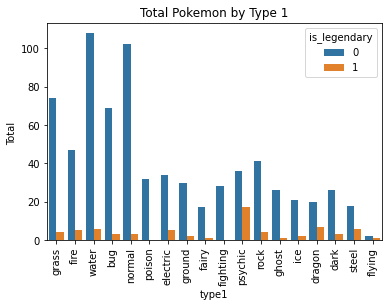

In [ ]:
import matplotlib.pyplot as plt
sns.set_color_codes("pastel")
ax = sns.countplot(x="type1", hue="is_legendary", data=results3)
#f.set_xticklabels(rotation=30)
plt.xticks(rotation= 90)
plt.xlabel('type1')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 1")

Text(0.5, 1.0, 'Total Pokemon by Type 2')

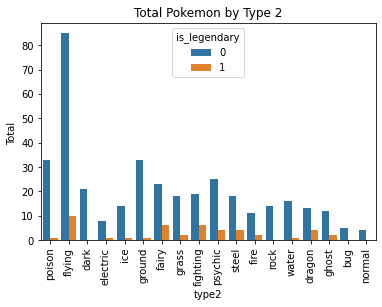

In [ ]:
ax = sns.countplot(x="type2", hue="is_legendary", data=results3)
plt.xticks(rotation= 90)
plt.xlabel('type2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

Water, normal, bug and grass are the most common type 1 and flying, ground and poison are the most common type 2. There are 1 million grass type 1 pokemon in the world, the graphs tell me which attributes are most apparent. This can possibly be useful by predicting the liklihood of battling a particular type of pokemon and having a counter type to it. For example, a water type pokemon. Since we know water pokemon are weak agaisnt grass or electric, it might be a good idea to keep one of those types in our battle squad.

In [ ]:
# aggregate our win percentage by type 1

In [ ]:
results3.groupby('type1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")

,Win Percentage
type1,
fairy,0.422791
steel,0.425008
grass,0.457399
psychic,0.460813
ground,0.485863
electric,0.490484
ice,0.492746
fire,0.493053
water,0.511383


Flying, dragon and poison type pokemon have a significant win percentage over the other types. 

My hypothesis is that there are many pokemons whos attacks are ineffective while the other pokemon is flying, thus giving the other pokemon a significant advantage.

#Seaborn Pairplot

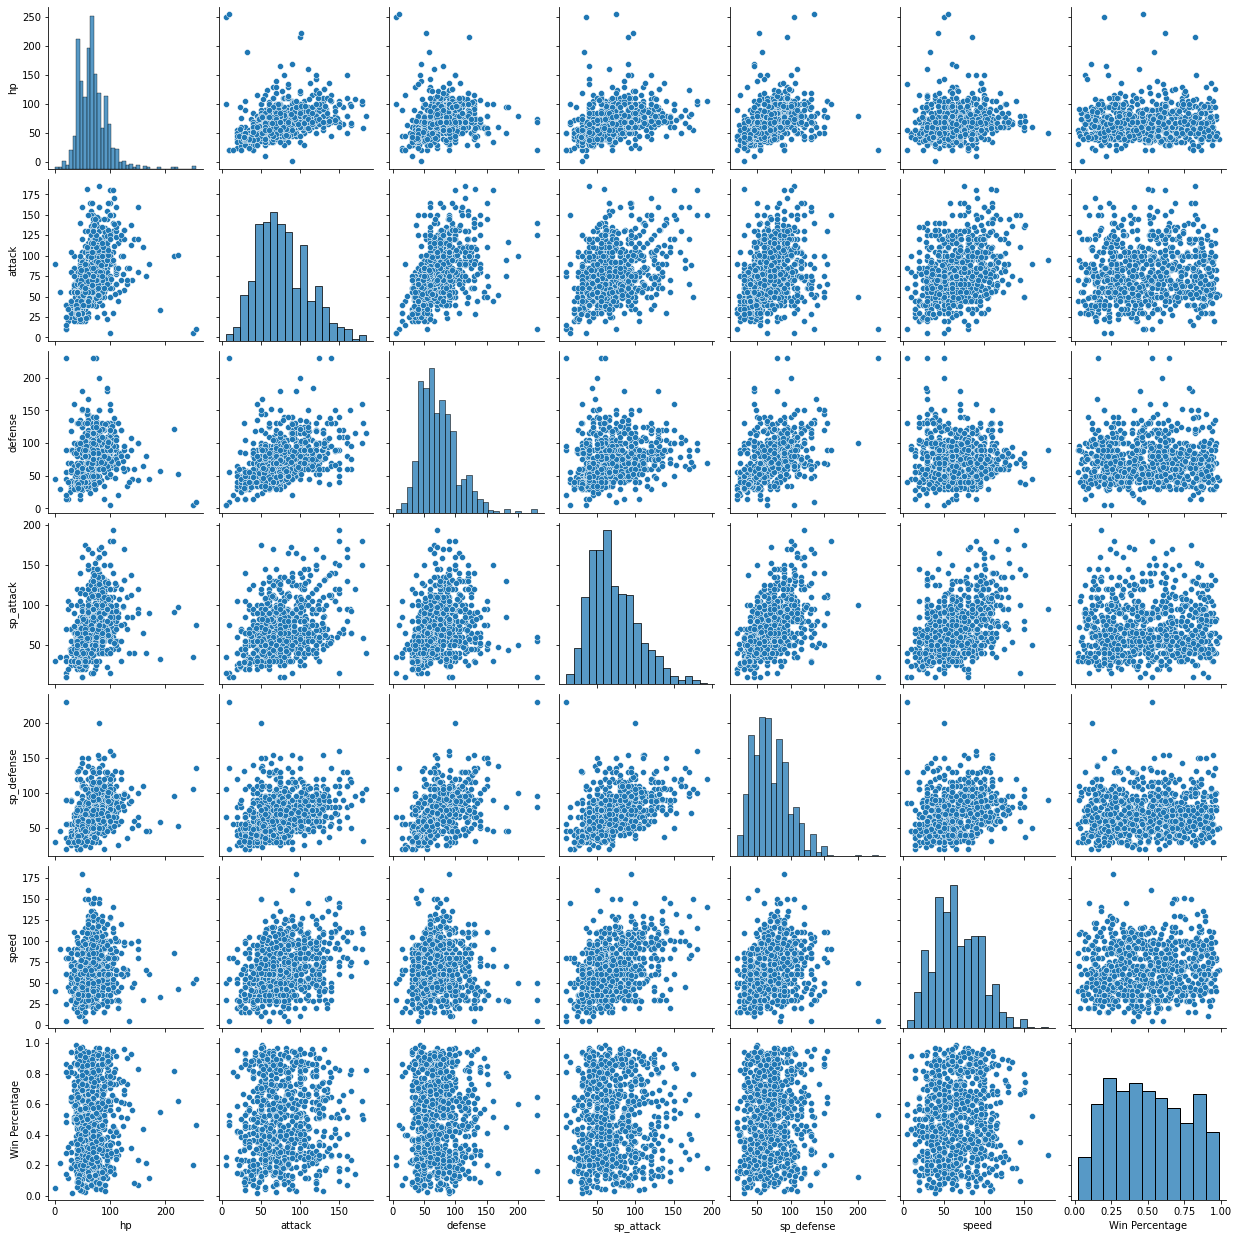

In [ ]:
#We can further break down the data by looking at type by generation, legendary by generation, stats by type, stats by generation, stats by lengendary and so on.
col = ['type1','hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'Win Percentage']
sns.pairplot(results3.loc[:,col].dropna())

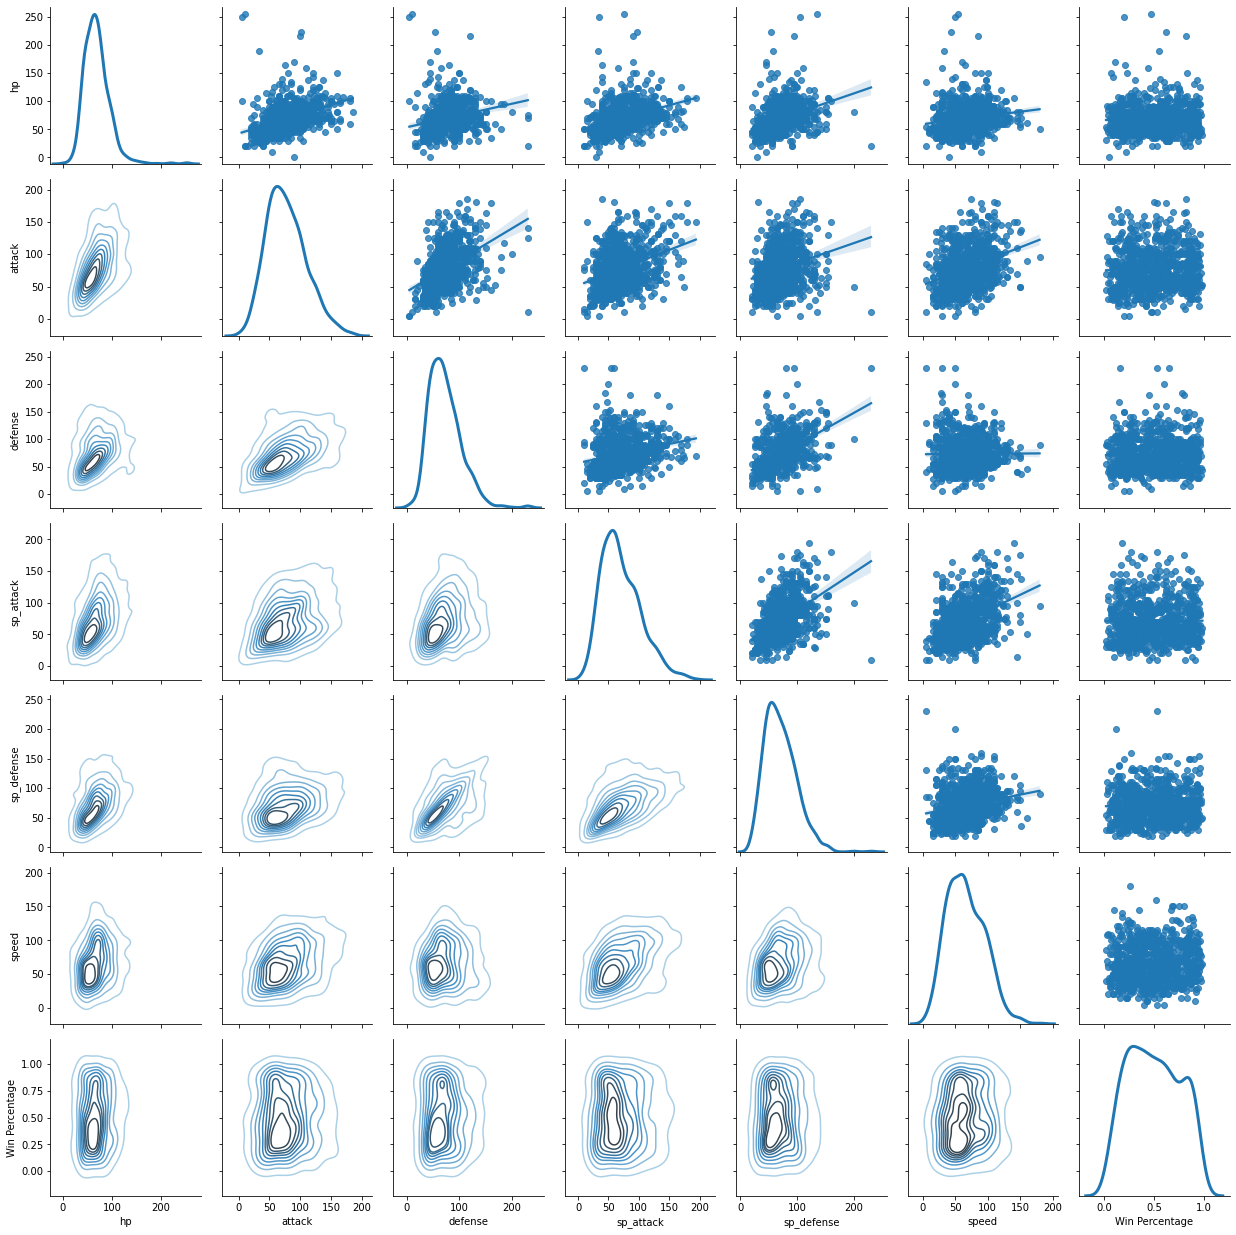

In [ ]:
import matplotlib.pyplot as plt

g = sns.PairGrid(results3.loc[:,col], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)

#Correlation Table

In [ ]:
results3.loc[:,col].corr()

,hp,attack,defense,sp_attack,sp_defense,speed,Win Percentage
hp,1.000000,0.410616,0.242378,0.365973,0.366971,0.160760,0.047793
attack,0.410616,1.000000,0.468915,0.368154,0.265836,0.352703,0.048753
defense,0.242378,0.468915,1.000000,0.241882,0.526348,0.007934,0.037205
sp_attack,0.365973,0.368154,0.241882,1.000000,0.511496,0.438981,0.004366
sp_defense,0.366971,0.265836,0.526348,0.511496,1.000000,0.225977,0.024653
speed,0.160760,0.352703,0.007934,0.438981,0.225977,1.000000,0.060086
Win Percentage,0.047793,0.048753,0.037205,0.004366,0.024653,0.060086,1.000000


 Looking at the features with the highest correlation to winning are speed and attack.

###Exploratory Data Analysis Conclusions

In [ ]:
#Water, normal, bug and grass are the most common type 1 and flying, ground and poison are the most common type 2.

For a business model profiting off of pokemon battles having pokemon in their battle squad to counter these types would be a better influence on the outcome of the battle.

In [ ]:
#The Pokemon type that win the most are flying, dragon, electric and dark. The Pokemon type that win the least are fairy, rock, steel, poison.

These kinds of Pokemon (flying, dragon, electric and dark) would be best to spend resources on because they win. Having the pokemon: fairy, rock, steel, or  poison would waste resources. Releasing any of them into the wild could reduce overhead cost.

In [ ]:
#Speed and attack are what matter in wins

Powerful attacks and quickness are how pokemon win championships. The top 10 most winning pokemon, all have speeds over 100+ and attacks over 100+. Its best to assume this is a powerful strategy to win battles. 